<a href="https://colab.research.google.com/github/nightitachi/NLP_Project-2024_US_Election_Sentiment_on_X/blob/main/2024_US_Election_Sentiment_on_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alibelhrak 
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x


100%|██████████| 14.5k/14.5k [00:00<00:00, 17.0MB/s]

# Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading Dataset

In [4]:
df_train = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/train.csv')
df_val = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/val.csv')
df_test = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/test.csv')

In [5]:
df_train


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


In [6]:
df_train['candidate'].value_counts()

,count
candidate,
Kamala Harris,100
Donald Trump,100
Jill Stein,100
Robert Kennedy,100
Chase Oliver,100


In [7]:
df_train['sentiment'].value_counts()

,count
sentiment,
positive,328
neutral,126
negative,45
positive,1


# Data Preparation

In [8]:
df_train_text = df_train['tweet_text']
df_valid_text = df_val['tweet_text']
df_test_text = df_test['tweet_text']

In [73]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train_text)

train_sequences = tokenizer.texts_to_sequences(df_train_text)
valid_sequences = tokenizer.texts_to_sequences(df_valid_text)
test_sequences = tokenizer.texts_to_sequences(df_test_text)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=50, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post')


all_labels = list(df_train['sentiment']) + list(df_val['sentiment']) + list(df_test['sentiment'])

label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels = label_encoder.transform(df_train['sentiment'])
valid_labels = label_encoder.transform(df_val['sentiment'])
test_labels = label_encoder.transform(df_test['sentiment'])

onehot_encoder = OneHotEncoder(sparse_output=False)

train_labels = np.array(train_labels).reshape(-1, 1)
valid_labels = np.array(valid_labels).reshape(-1, 1)
test_labels = np.array(test_labels).reshape(-1, 1)

train_onehot_labels = onehot_encoder.fit_transform(train_labels)
valid_onehot_labels = onehot_encoder.transform(valid_labels)
test_onehot_labels = onehot_encoder.transform(test_labels)

print("Train input shape:", train_padded.shape)
print("Train label shape:", train_onehot_labels.shape)
print("Validation input shape:", valid_padded.shape)
print("Validation label shape:", valid_onehot_labels.shape)
print("Test input shape:", test_padded.shape)
print("Test label shape:", test_onehot_labels.shape)


Train input shape: (500, 50)
Train label shape: (500, 4)
Validation input shape: (50, 50)
Validation label shape: (50, 4)
Test input shape: (50, 50)
Test label shape: (50, 4)


In [31]:
train_input = np.array(trained_padded_sequences)
val_input = np.array(valid_padded_sequences)
test_input = np.array(test_padded_sequences)

# ✅ Use the correct label variables
train_label = np.array(train_onehot_labels)
val_label = np.array(valid_onehot_labels)
test_label = np.array(test_onehot_labels)

# Check shapes
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)
print("Test input shape:", test_input.shape)
print("Test label shape:", test_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 4)
Validation input shape: (50, 50)
Validation label shape: (50, 4)
Test input shape: (50, 50)
Test label shape: (50, 4)


# Creating The Model

In [43]:
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
embedding_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
print(type(train_input), train_input.shape)
print(type(train_label), train_label.shape)


<class 'numpy.ndarray'> (500, 50)
<class 'numpy.ndarray'> (500, 4)


In [39]:
train_input = np.array(train_input, dtype=np.float32)
train_label = np.array(train_label, dtype=np.float32)


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
print("Train label shape:", train_label.shape)
print("Validation label shape:", val_label.shape)


Train label shape: (500, 4)
Validation label shape: (50, 4)


In [34]:
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 4)
Validation input shape: (50, 50)
Validation label shape: (50, 4)


In [45]:
history = model.fit(train_input, train_label, epochs=64, batch_size=32, validation_data=(val_input, val_label))


Epoch 1/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.5516 - loss: 1.2356 - val_accuracy: 0.6800 - val_loss: 0.8854
Epoch 2/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6399 - loss: 0.9630 - val_accuracy: 0.6800 - val_loss: 0.8343
Epoch 3/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6449 - loss: 0.8999 - val_accuracy: 0.6800 - val_loss: 0.8027
Epoch 4/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6688 - loss: 0.8879 - val_accuracy: 0.6800 - val_loss: 0.7987
Epoch 5/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.6167 - loss: 0.9399 - val_accuracy: 0.6800 - val_loss: 0.7958
Epoch 6/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6556 - loss: 0.9204 - val_accuracy: 0.6800 - val_loss: 0.7999
Epoch 7/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6542 - loss: 0.8669 - val_accuracy: 0.6800 - val_loss: 0.7993
Epoch 8/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6496 - loss: 0.9154 - val_accuracy: 0.6800 

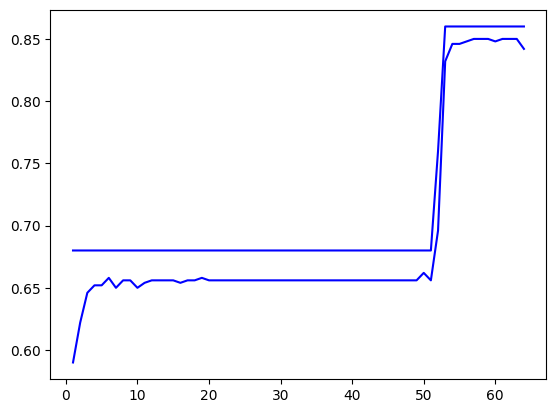

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1 , len(acc) +1)
plt.plot(epochs, acc , color = 'b' )
plt.plot(epochs, val_acc , color = 'b' )
plt.show()

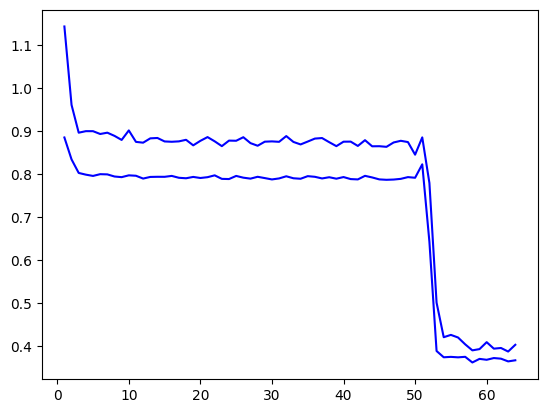

In [48]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1 , len(acc) +1)
plt.plot(epochs, acc , color = 'b' )
plt.plot(epochs, val_acc , color = 'b' )
plt.show()

# Saving Model

In [80]:
saved_model =model.save('my_model.h5')
saved_model

# Saving History

In [81]:
import json
with open('training_history.json' ,'w') as f:
  json.dump(history.history , f)

# Showing Confusion Matrix And Classification Reaport

In [58]:
prediction = model.predict(test_input)
predicted_classes = np.argmax(prediction, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [60]:
y_true =test_onehot_labels
y_true_classes = np.argmax(y_true, axis=1)


In [62]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

cm = confusion_matrix(predicted_classes , y_true_classes)
cm

array([[ 0,  0,  0],
       [ 3, 13,  4],
       [ 0,  0, 30]])

In [65]:
AS = accuracy_score(predicted_classes , y_true_classes)
AS

0.86

In [67]:
CR = classification_report(y_true_classes, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.65      1.00      0.79        13
           2       1.00      0.88      0.94        34

    accuracy                           0.86        50
   macro avg       0.55      0.63      0.58        50
weighted avg       0.85      0.86      0.84        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


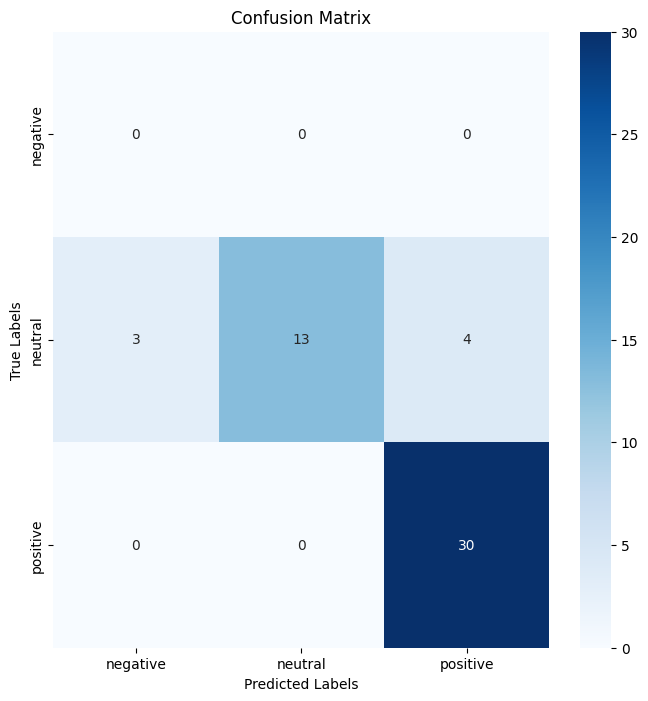

In [72]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=la.classes_, yticklabels=la.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()